In [2]:
import pandas as pd 
import numpy as np 
import re 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from nltk.stem import WordNetLemmatizer
counter=0
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


In [4]:
df = pd.read_csv("cleancsv.csv")
lemmatizer = WordNetLemmatizer()

In [5]:
def clean_text (text):
    title =re.sub('[^a-zA-Z]' ,' ', str(text))
    title = title.lower()
    title = title.split()
    title = [lemmatizer.lemmatize(word) for word in title if not word in set (stopwords.words('english'))]
    title =[lemmatizer.lemmatize(word,pos='v') for word in title]
    title = ' '.join(title)
    global counter
    counter=counter+1
    print(counter)
    return title


In [2]:
#df['title'] = df['title'].apply(clean_text)

In [1]:
#df['text'] = df['text'].apply(clean_text)

In [10]:
df.to_csv('clean_csv.csv')

In [12]:
ahmed = pd.read_csv("cleancsv.csv")

In [13]:
ahmed.head()

,title,text,label
0,house dem aide even see comey letter jason cha...,house dem aide even see comey letter jason cha...,1
1,flynn hillary clinton big woman campus breitbart,ever get feel life circle roundabout rather he...,0
2,truth might get fire,truth might get fire october tension intellige...,1
3,civilian kill single u airstrike identify,video civilian kill single u airstrike identif...,1
4,iranian woman jail fictional unpublished story...,print iranian woman sentence six year prison i...,1


In [115]:
#ahmed.drop('author',axis=1,inplace=True)

In [20]:
df.head()

,title,text,label
0,house dem aide even see comey letter jason cha...,house dem aide even see comey letter jason cha...,1
1,flynn hillary clinton big woman campus breitbart,ever get feel life circle roundabout rather he...,0
2,truth might get fire,truth might get fire october tension intellige...,1
3,civilian kill single u airstrike identify,video civilian kill single u airstrike identif...,1
4,iranian woman jail fictional unpublished story...,print iranian woman sentence six year prison i...,1


In [31]:
ahmed1.to_csv("cleancsv.csv" , index=False)

In [3]:
ahmed1 = pd.read_csv("cleancsv.csv")

In [7]:
ahmed1.head()

,title,text,label
0,house dem aide even see comey letter jason cha...,house dem aide even see comey letter jason cha...,1
1,flynn hillary clinton big woman campus breitbart,ever get feel life circle roundabout rather he...,0
2,truth might get fire,truth might get fire october tension intellige...,1
3,civilian kill single u airstrike identify,video civilian kill single u airstrike identif...,1
4,iranian woman jail fictional unpublished story...,print iranian woman sentence six year prison i...,1


In [8]:
ahmed1.isna().sum()

title    0
text     0
label    0
dtype: int64

In [9]:
ahmed1.describe()

,label
count,19962.000000
mean,0.479711
std,0.499601
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [23]:
#e show there the balance between the class label 
ahmed1.groupby("label").count()

,title,text
label,,
0,10386,10386
1,9576,9576


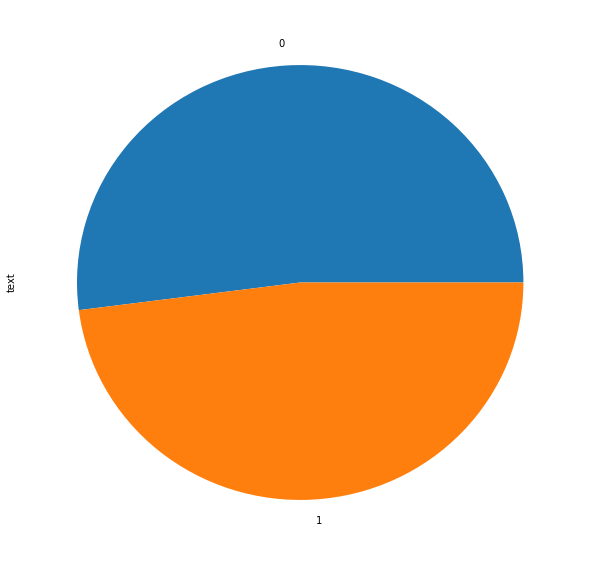

In [28]:
#plot data
fig, ax = plt.subplots(figsize=(10,10))
ahmed1.groupby("label").count()['text'].plot(kind = "pie")

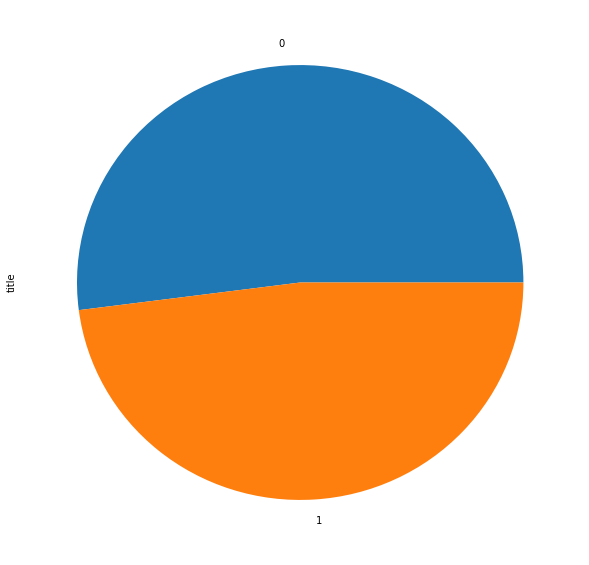

In [29]:
#plot data
fig, ax = plt.subplots(figsize=(10,10))
ahmed1.groupby("label").count()['title'].plot(kind = "pie")

In [14]:
all_words = [word for tokens in ahmed1["text"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in ahmed1["text"]]

In [15]:
type(all_words)

list

In [16]:
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

59944329 words total, with a vocabulary size of 27
Max sentence length is 77292


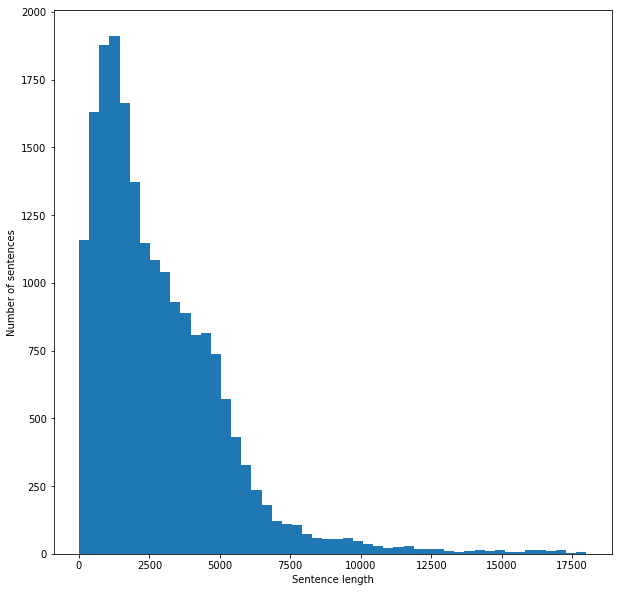

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
#plt.xticks(np.arange(min(x), max(x)+1,20000)
#plt.xticks(np.arange(1,20000,2000))
plt.hist(sentence_lengths , bins= 50 , range=(0, 18000))
plt.show()

In [ ]:
all_words = [word for tokens in clean_questions["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in clean_questions["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

In [6]:
tfidf = TfidfVectorizer()
# x = tfidf.fit_transform(data["title"]).toarray()
x = ahmed1["text"]
y = ahmed1['label']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
model = tfidf.fit_transform(x_train)
predection = tfidf.transform(x_test)
